In [528]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("survey_responses.csv")

# Remove whitespace from column names
df.columns = df.columns.str.strip()

df = df.drop(columns=['Timestamp'])

# Merge age categories, replacing 'Under 18' and '18 – 20' with 'Under 21', because 'Under 18' has only 1 response
df['What is your age?'] = df['What is your age?'].replace({
    'Under 18': 'Under 21',
    '18 – 20': 'Under 21'
})

# Rename columns
question_texts = {f"Q{i+1}": col for i, col in enumerate(df.columns)}
df.columns = list(question_texts.keys())



In [529]:
question_types = {
    "Q1": "multiple choice",
    "Q2": "multiple choice",
    "Q3": "multiple choice",
    "Q4": "short answer",
    "Q5": "short answer",
    "Q6": "multiple choice",
    "Q7": "likert scale",
    "Q8": "checkbox",
    "Q9": "likert scale",
    "Q10": "checkbox",
    "Q11": "likert scale",
    "Q12": "likert scale",
    "Q13": "checkbox",
    "Q14": "multiple choice",
    "Q15": "multiple choice",
    "Q16": "checkbox",
    "Q17": "checkbox",
    "Q18": "likert scale",
    "Q19": "multiple choice",
    "Q20": "checkbox",
    "Q21": "open-ended",
    "Q22": "checkbox",
    "Q23": "multiple choice",
    "Q24": "likert scale",
    "Q25": "multiple choice",
    "Q26": "open-ended",
    "Q27": "multiple choice",
    "Q28": "multiple choice",
    "Q29": "multiple choice",
    "Q30": "multiple choice",
    "Q31": "multiple choice",
    "Q32": "likert scale",
    "Q33": "checkbox",
    "Q34": "likert scale",
    "Q35": "checkbox",
    "Q36": "open-ended",
    "Q37": "open-ended",
    "Q38": "open-ended"
}

# Table
rows = []
for q, text in question_texts.items():
    rows.append({
        "Q": q,
        "Type": question_types.get(q),
        "Text": text
    })

# Create DF
questions_df = pd.DataFrame(rows)
# questions_df # Uncomment to get a preview of the survey questions


In [530]:
# Map official option to relevant questions

official_options_map = {
    # multiple choice options
    "Q1": [
        "Under 21",
        "21 – 23",
        "24 – 26",
        "27 or older"
    ],
    "Q2": [
        "Female",
        "Male",
        "Non-binary",
        "Prefer not to say"
    ],
    "Q3": [
        "BTS",
        "Bachelor",
        "Master",
        "PhD or Doctoral studies"
    ],
    "Q6": [
        "None / I eat everything",
        "Vegetarian",
        "Vegan",
        "Halal",
        "Kosher",
        "Gluten-Free",
        "Lactose-Free",
        "Allergies or intolerances"
    ],
    "Q14": [
        "Yes, significantly",
        "Yes",
        "Only a bit",
        "Not at all"
    ],
    "Q15": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q19": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q23": [
        "I’d be more willing",
        "I’d be less willing",
        "It wouldn’t make a difference",
        "Not sure"
    ],
    "Q25": [
        "More likely",
        "Less likely",
        "No effect",
        "Not sure"
    ],
    "Q27": [
        "Yes, many times",
        "Yes, sometimes",
        "No, but I’ve used it for other topics",
        "No, I’ve never used tools like ChatGPT",
        "I’ve heard of them, but never tried them"
    ],
    "Q28": [
        "Yes",
        "No"
    ],
    "Q29": [
        "Yes, often",
        "Occasionally",
        "Rarely",
        "Never",
        "Not applicable / I don’t follow such preferences"
    ],
    "Q30": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q31": [
        "A chat-style conversation",
        "A form where I fill in options and get advice",
        "A mix of both",
        "Not sure"
    ],

    # checkbox options
    "Q8": [
        "I skip meals",
        "I crave unhealthy or comfort food",
        "I snack more often",
        "I eat at irregular times",
        "I eat healthier to stay focused",
        "No major changes"
    ],
    "Q10": [
        "Time availability",
        "Budget constraints",
        "Physical wellbeing",
        "Emotional state",
        "Social influence"
    ],
    "Q13": [
        "Nutritional goals",
        "Mood or emotional state",
        "Energy or focus levels",
        "Cultural food preferences",
        "Budget constraints",
        "Sleep or physical health",
        "Device data, like wearables",
        "Religious or ethical preferences",
        "Available time to cook or eat"
    ],
    "Q16": [
        "Adapts to my daily schedule or workload",
        "Considers my budget or what food I have",
        "Suggests quick meals when I'm busy",
        "Checks how I feel before suggesting food",
        "Lets me rate or respond to each recommendation"
    ],
    "Q17": [
        "Gentle reminders",
        "Motivational messages based on how I feel",
        "Tracking meals or consistency",
        "Celebrating small successes",
        "Healthier snack suggestions",
        "Setting flexible daily goals",
        "Challenges with friends or study groups"
    ],
    "Q20": [
        "It matches my dietary needs",
        "It reflects my mood or energy level",
        "It gives a scientific or nutritional reason for its suggestions",
        "It builds on what I’ve chosen before",
        "It uses friendly or human-like language",
        "It fits my current routine or schedule",
        "It allows me to give feedback on suggestions"
    ],
    "Q22": [
        "My dietary needs or preferences",
        "My stress levels",
        "My sleep patterns",
        "My daily schedule or class timetable",
        "My emotional state",
        "My budget",
        "Data from wearables or health trackers"
    ],
    "Q33": [
        "Pre-written templates to show how to ask a question",
        "Step-by-step help for making a request",
        "A helpful conversation that asks clarifying questions",
        "Automatic suggestions based on my situation, like time or stress level",
        "Easy ways to adjust or rewrite my request"
    ],
    "Q35": [
        "Rephrase my request and try again",
        "Ask a follow-up to clarify",
        "Stop using it and look elsewhere",
        "Not sure"
    ]
}


In [531]:
# Likert scale mappings for questions

likert_maps = {
    "Q7": {
        1: "Never",
        2: "Rarely",
        3: "Sometimes",
        4: "Often",
        5: "Always"
    },
    "Q9": {
        1: "Not difficult at all",
        2: "Slightly difficult",
        3: "Moderately difficult",
        4: "Very difficult",
        5: "Extremely difficult"
    },
    "Q11": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q12": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q18": {
        1: "Not at all",
        2: "Slightly",
        3: "Moderately",
        4: "Mostly",
        5: "Completely"
    },
    "Q24": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q32": {
        1: "Not confident at all",
        2: "Slightly confident",
        3: "Moderately confident",
        4: "Confident",
        5: "Very confident"
    },
    "Q34": {
        1: "Not at all",
        2: "Slightly",
        3: "Moderately",
        4: "Very",
        5: "Very much"
    }
}


In [532]:
# Field mapping for Field of Study into broader categories

field_map = {
    # STEM
    'Computer Science': 'STEM',
    'Mathematics': 'STEM',
    'IT': 'STEM',
    'Informatics': 'STEM',
    'Computer Engineering': 'STEM',
    'Computer Science Engineering': 'STEM',
    'Data Science': 'STEM',
    'Data Science and Artificial Intelligence': 'STEM',
    'Neuromorphic Computing': 'STEM',
    'HPC': 'STEM',
    'Physics': 'STEM',
    'Space': 'STEM',
    'Civil Engineering': 'STEM',
    'Environmental Engineering': 'STEM',
    'Computational Biology': 'STEM',
    'Computational Linguistics': 'STEM',
    'Game Design & Development': 'STEM',

    # Health & Life Sciences
    'Sport and Exercise Science': 'Health & Life Sciences',
    'Sport Management': 'Health & Life Sciences',
    'Sport Management and Digitalisation': 'Health & Life Sciences',
    'Physiotherapy': 'Health & Life Sciences',
    'Nursing': 'Health & Life Sciences',
    'Biology': 'Health & Life Sciences',
    'Integrated Systems Biology': 'Health & Life Sciences',
    'Nutrition': 'Health & Life Sciences',
    'Nutrition Sciences': 'Health & Life Sciences',
    'Nutrition, Fitness & Health': 'Health & Life Sciences',

    # Business & Economics
    'Economics': 'Business & Economics',
    'Finance': 'Business & Economics',
    'Accounting': 'Business & Economics',
    'Accounting and Audit': 'Business & Economics',
    'Finance and Economics': 'Business & Economics',
    'Global Business': 'Business & Economics',
    'Innovation and Entrepreneurship': 'Business & Economics',
    'Digital Business and Innovation': 'Business & Economics',
    'Master in Management': 'Business & Economics',
    'Entrepreneurship': 'Business & Economics',
    'Management and Service Engineering': 'Business & Economics',
    'Human Resources Management': 'Business & Economics',

    # Social Sciences & Humanities
    'History': 'Social Sciences & Humanities',
    'German and History (Master of Education)': 'Social Sciences & Humanities',
    'Social Sciences': 'Social Sciences & Humanities',
    'Education': 'Social Sciences & Humanities',
    'Applied Linguistics': 'Social Sciences & Humanities',
    'Translation and Multilingual Communication': 'Social Sciences & Humanities',
    'English Literature': 'Social Sciences & Humanities',
    'Medieval and Early Modern Studies': 'Social Sciences & Humanities',
    'Design & Language (2BAs)': 'Social Sciences & Humanities',

    # Creative & Design
    'Graphics Design': 'Creative & Design',
    'Creative Writing': 'Creative & Design',
    'Media': 'Creative & Design',
}

In [533]:
# Function to process multiple choice questions

def process_multiple_choice(column, official_options):
    # Count all answers
    counts = df[column].value_counts(dropna=True)

    # Filter out official options
    counts_filtered = counts[counts.index.isin(official_options)]

    # Filter out "Other..."
    other_answers = counts[~counts.index.isin(official_options)]
    other_answers = other_answers[other_answers.index.str.strip() != ""]

    return counts_filtered, other_answers


In [534]:
# Function to process checkbox questions using MultiLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

def process_checkbox(column, official_options, join_to_df=False):
    # Get a list of all values
    list_col = df[column].fillna('').str.split(';')

    # Create dummy variables
    mlb = MultiLabelBinarizer()
    dummies = pd.DataFrame(mlb.fit_transform(list_col),
                           columns=mlb.classes_,
                           index=list_col.index)
    
    # Variable for official options
    filtered = dummies[official_options]

    # Variable for "Other..." options
    raw_others = set(mlb.classes_) - set(official_options)
    others = [opt for opt in raw_others if opt.strip() != ""]

    # Optional: Add new columns to dataframe for cross-analysis
    if join_to_df:
        # Add "QX_" to each new column
        filtered_prefixed = filtered.add_prefix(f"{column}_")
        updated_df = df.join(filtered_prefixed)

        # Add a "QX_Other" column if there are "Other..." options
        if others:
            others_mask = dummies[list(others)].sum(axis=1) > 0
            updated_df[f"{column}_Other"] = others_mask.astype(int)

        return filtered, others, dummies, updated_df

    return filtered, others, dummies


In [535]:
# Function to create a DataFrame for multiple choice questions

def mc_block(filtered, others, qid):
    counts = filtered.reindex(official_options_map[qid], fill_value=0)
    percent = (counts / len(df) * 100).round(2)
    mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

    # If there are "Other..." answers, add them to the results
    if len(others) > 0:
        other_count = others.sum()
        other_percent = round((other_count / len(df)) * 100, 2)
        
        # Append to mc_results
        mc_results.loc['Other'] = [other_count, other_percent]
        mc_results['Count'] = mc_results['Count'].astype(int)

    print(f"Quantitative results for {qid}")
    print("-----------------------")
    print(mc_results)
    print("-----------------------")

    # Save results of "Other..." answers in a CSV file
    if len(others) > 0:
        pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    return mc_results

# Show saved results of "Other..." answers
# if len(others) > 0:
#     print(f"\nOther answers from {qid}:")
#     print("-----------------------")
#     for answer in others.index:
#         print(answer)
# 
#     print("-----------------------")

In [536]:
# Function to create a DataFrame for checkbox questions

def cb_block(filtered, others, dummies, qid):
    counts = filtered.sum().sort_values(ascending=False)
    percent = (counts / len(df) * 100).round(2)
    cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

    # If there are "Other..." answers, add them to the results
    if others:
        others_mask = dummies[others].sum(axis=1) > 0
        other_count = others_mask.sum()
        other_percent = round((other_count / len(df)) * 100, 2)
        cb_results.loc['Other'] = [other_count, other_percent]
        cb_results['Count'] = cb_results['Count'].astype(int)


    print(f"Quantitative results for {qid}")
    print("-----------------------")
    print(cb_results)
    print("-----------------------")

    # Save results of "Other..." answers in a CSV file
    if len(others) > 0:
        pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    return cb_results


In [537]:
# Function to create a DataFrame for likert scale questions

def ls_block(qid):
    # Map the Likert scale options to the DataFrame
    df[f'{qid}_labeled'] = pd.Categorical(
        df[qid].map(likert_maps[qid]),
        categories=list(likert_maps[qid].values()),
        ordered=True
    )

    counts = df[f'{qid}_labeled'].value_counts().sort_index()
    percent = (counts / len(df) * 100).round(2)
    ls_results = pd.DataFrame({'Count': counts, 'Percent': percent})

    print(f"Quantitative results for {qid}")
    print("-----------------------")
    print(ls_results)
    print("-----------------------")

    return ls_results


In [538]:
# Function to create a DataFrame for open-ended questions

def open_ended_block(qid):
    answers = df[qid].dropna().str.strip()
    # Remove answers that are just punctuation or whitespace
    answers = answers[~answers.str.match(r'^[\.\,\-\/\?\:\s]*$')]

    print(f"{len(answers)} responses for {qid}")

    answers.to_csv(f"{qid}_cleaned.csv", index=False)

    return answers

In [539]:
# Calculate statistics for Likert scale questions

def calculate_likert_statistics(qid):
    mean_score = df[qid].mean()
    median_score = df[qid].median()
    std_score = df[qid].std()
    high_difficulty_percent = (
        ((df[qid] == 4).sum() + (df[qid] == 5).sum()) / len(df[qid]) * 100
    )
    low_percent = (
        ((df[qid] == 1).sum() + (df[qid] == 2).sum()) / len(df[qid]) * 100
    )

    print(f"Mean: {mean_score:.2f}")
    print(f"Median: {median_score}")
    print(f"Standard Deviation: {std_score:.2f}")
    print(f"Percentage rating '4' or '5': {high_difficulty_percent:.1f}%")
    print(f"Percentage rating '1' or '2': {low_percent:.1f}%")


In [540]:
""" -------------------- RESULTS -------------------- """

' -------------------- RESULTS -------------------- '

Quantitative results for Q1
-----------------------
             Count  Percent
Q1                         
Under 21         9     8.26
21 – 23         24    22.02
24 – 26         48    44.04
27 or older     28    25.69
-----------------------


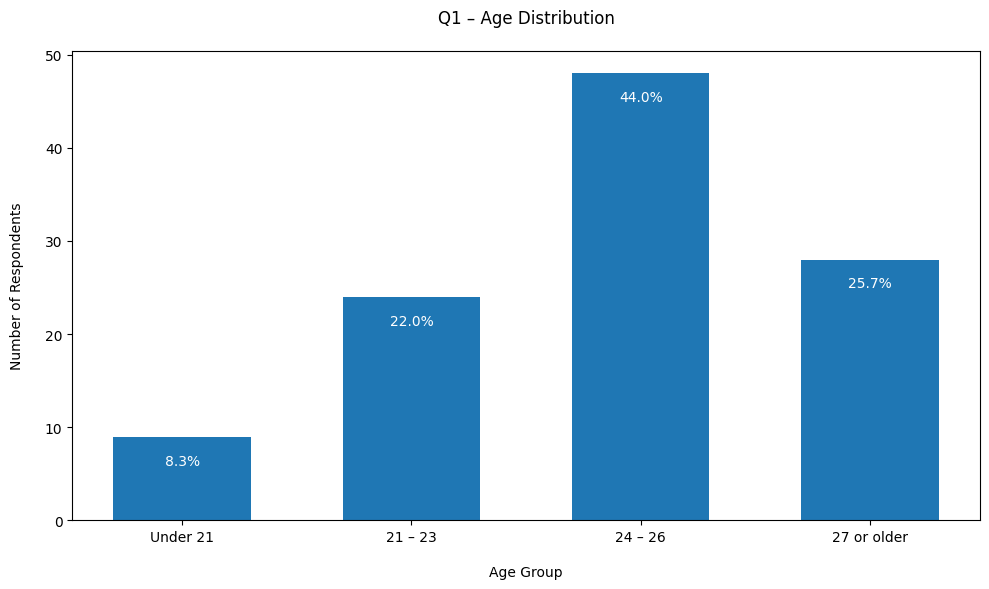

In [541]:
# Q1 – Age (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q1'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q1 – Age Distribution', pad=20)
plt.xlabel('Age Group', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')


plt.tight_layout()
plt.show()



Quantitative results for Q2
-----------------------
                   Count  Percent
Q2                               
Female                49    44.95
Male                  57    52.29
Non-binary             2     1.83
Prefer not to say      1     0.92
-----------------------


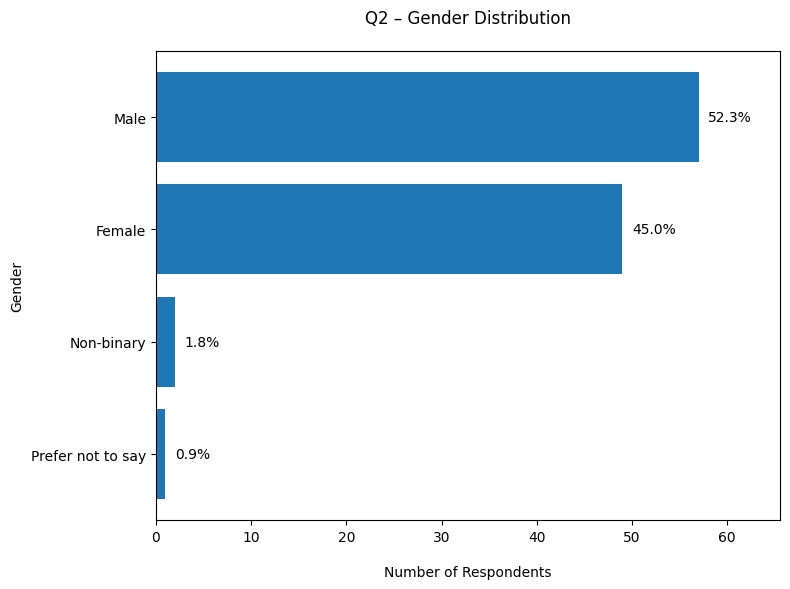

In [542]:
# Q2 – Gender (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q2'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Sort by count
mc_results_sorted = mc_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_sorted.index, mc_results_sorted['Count'], color='#1f77b4')
plt.title('Q2 – Gender Distribution', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Gender', labelpad=5)
max_count = mc_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q3
-----------------------
                         Count  Percent
Q3                                     
BTS                          3     2.75
Bachelor                    37    33.94
Master                      59    54.13
PhD or Doctoral studies     10     9.17
-----------------------


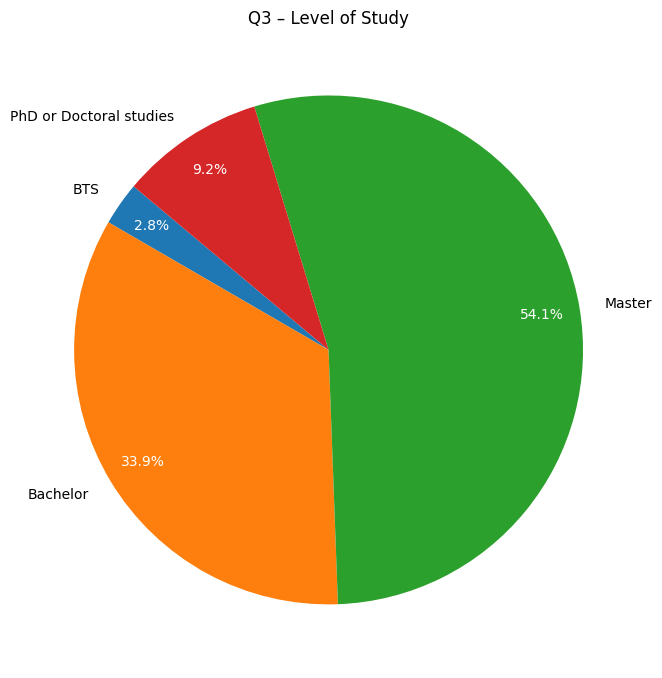

In [543]:
# Q3 – Level of Study (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q3'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    mc_results['Count'],
    labels=mc_results.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Q3 – Level of Study')
plt.tight_layout()
plt.show()

Quantitative results for Q4
-----------------------
                              Count  Percent
Q4                                          
STEM                             49    44.95
Health & Life Sciences           25    22.94
Business & Economics             20    18.35
Social Sciences & Humanities     12    11.01
Creative & Design                 3     2.75
-----------------------


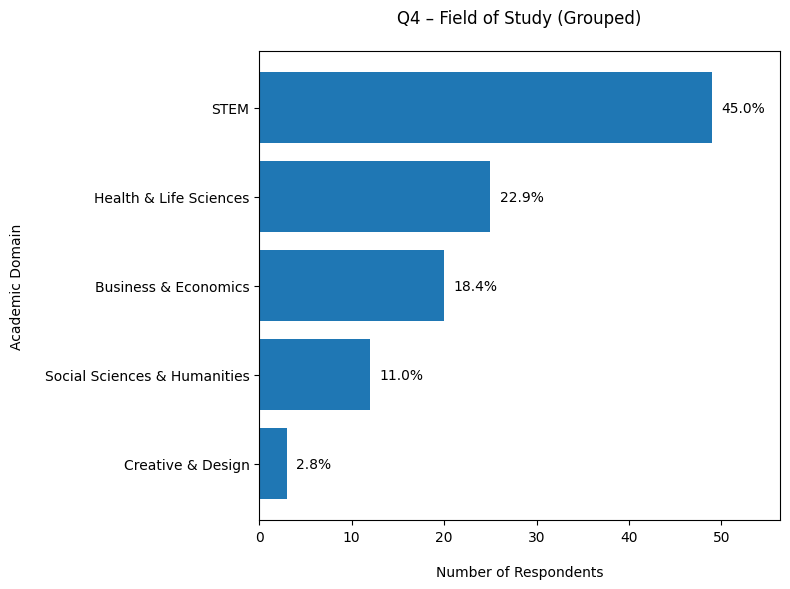

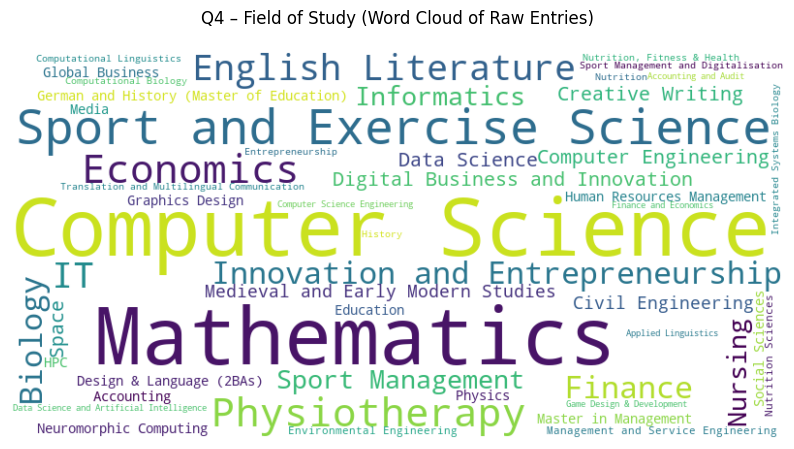

In [544]:
# Q4 – Field of Study (Short Answer)
# Cross-analysis count: 0

qid = 'Q4'

q4_clean = df[qid].dropna().str.strip()

q4_grouped = q4_clean.map(field_map)

# Counts
counts = q4_grouped.value_counts()
percent = (counts / len(q4_grouped) * 100).round(2)
q4_grouped_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(q4_grouped_results)
print("-----------------------")

# Sort by count
mc_results_sorted = q4_grouped_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_sorted.index, mc_results_sorted['Count'], color='#1f77b4')
plt.title('Q4 – Field of Study (Grouped)', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Academic Domain', labelpad=15)
max_count = mc_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)
plt.xticks(range(0, 60, 10))


# Add values next to bars
for bar, perc in zip(bars, mc_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()

# Wordcloud for Q4
from collections import Counter
from wordcloud import WordCloud

# Create a word cloud from the raw entries of Q4
freq = Counter(q4_clean)
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Q4 – Field of Study (Word Cloud of Raw Entries)', pad=20)
plt.show()

# Export to CSV
q4_clean.to_csv(f"{qid}_results.csv")


Quantitative results for Q5
-----------------------
                Count  Percent
Q5                            
Luxembourg         80    73.39
Portugal            7     6.42
Germany             6     5.50
Belgium             6     5.50
France              5     4.59
United Kingdom      3     2.75
Switzerland         1     0.92
Netherlands         1     0.92
-----------------------


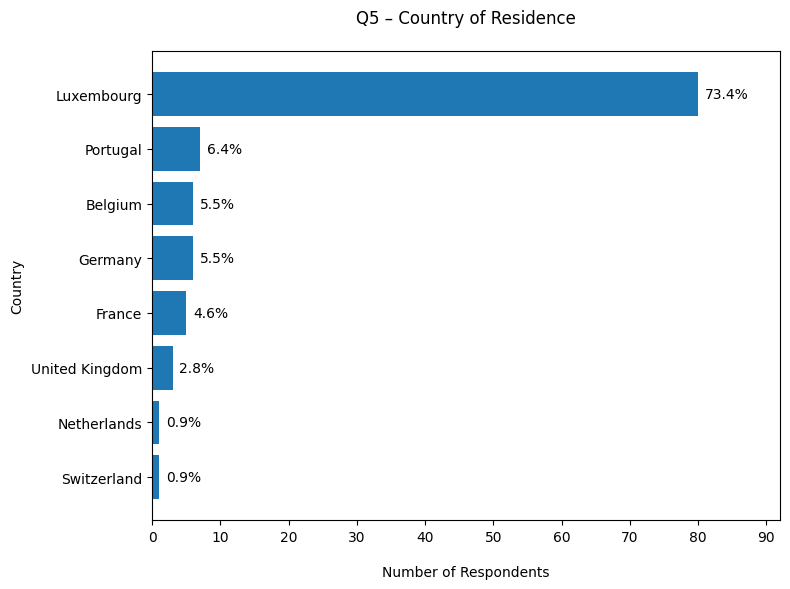

In [545]:
# Q5 – Country of Residence (Short Answer)
# Cross-analysis count: 0

qid = 'Q5'

q5_clean = df[qid].dropna().str.strip()

# Counts and percentages
counts = q5_clean.value_counts()
percent = (counts / len(q5_clean) * 100).round(2)
q5_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(q5_results)
print("-----------------------")

# Sort by count
mc_results_sorted = q5_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_sorted.index, mc_results_sorted['Count'], color='#1f77b4')
plt.title('Q5 – Country of Residence', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Country', labelpad=5)
max_count = mc_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)
plt.xticks(range(0, 100, 10))


# Add values next to bars
for bar, perc in zip(bars, mc_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q6
-----------------------
                           Count  Percent
Q6                                       
None / I eat everything       77    70.64
Vegetarian                     9     8.26
Vegan                          0     0.00
Halal                          6     5.50
Kosher                         0     0.00
Gluten-Free                    0     0.00
Lactose-Free                   5     4.59
Allergies or intolerances      6     5.50
Other                          6     5.50
-----------------------


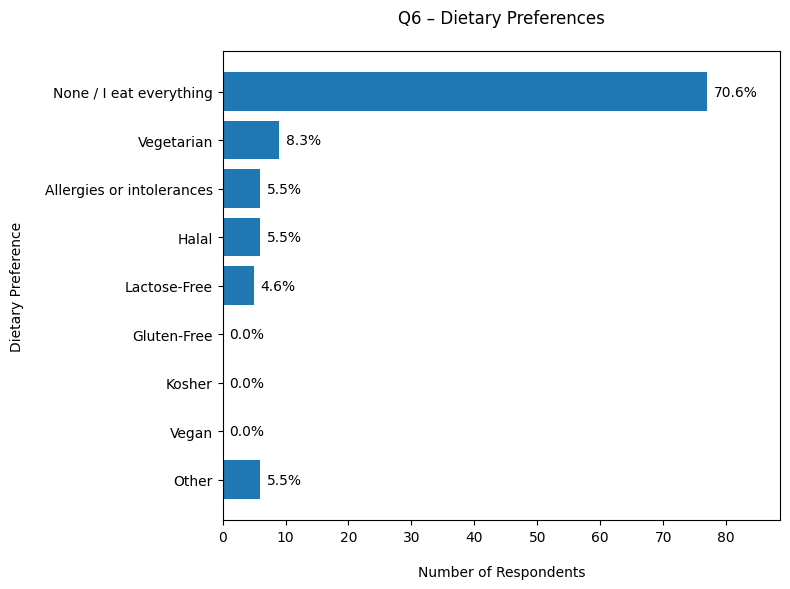

In [546]:
# Q6 – Dietary Preferences (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q6'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Sort by count and move "Other" to the bottom
other_row = mc_results.loc[['Other']]
main_rows = mc_results.drop('Other')
mc_results_sorted = pd.concat([
    other_row,
    main_rows.sort_values(by='Count', ascending=True)
])

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_sorted.index, mc_results_sorted['Count'], color='#1f77b4')
plt.title('Q6 – Dietary Preferences', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Dietary Preference', labelpad=15)
max_count = mc_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q7
-----------------------
            Count  Percent
Q7_labeled                
Never          11    10.09
Rarely         17    15.60
Sometimes      25    22.94
Often          34    31.19
Always         22    20.18
-----------------------
Mean: 3.36
Median: 4.0
Standard Deviation: 1.25
Percentage rating '4' or '5': 51.4%
Percentage rating '1' or '2': 25.7%


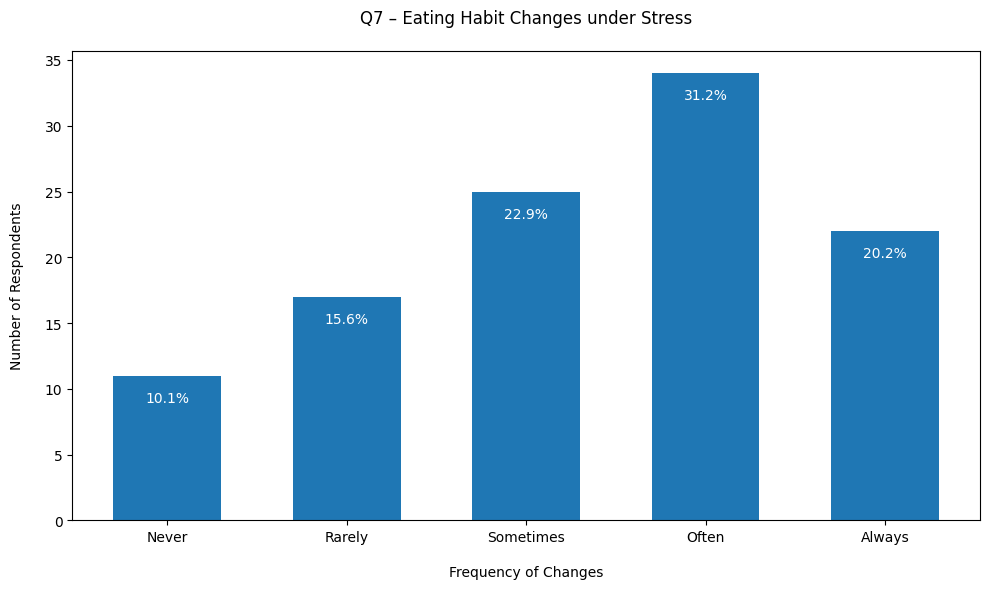

In [547]:
# Q7 – Eating Habit Changes under Stress (Likert Scale)
# Cross-analysis count: 0

qid = 'Q7'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q7 – Eating Habit Changes under Stress', pad=20)
plt.xlabel('Frequency of Changes', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q8
-----------------------
                                   Count  Percent
I snack more often                    56    51.38
I eat at irregular times              54    49.54
I crave unhealthy or comfort food     51    46.79
I skip meals                          35    32.11
No major changes                      13    11.93
I eat healthier to stay focused        5     4.59
Other                                  4     3.67
-----------------------


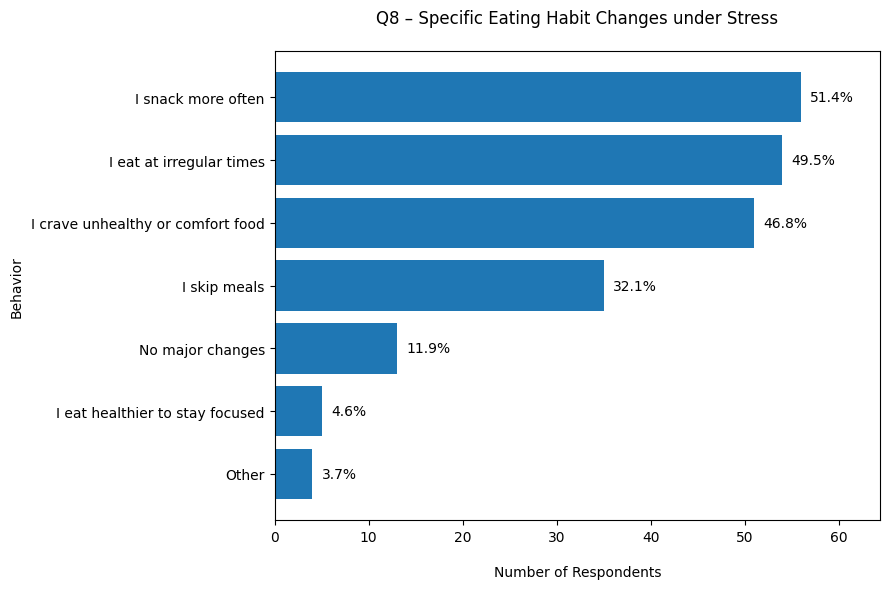

In [548]:
# Q8 – Specific Eating Habit Changes under Stress (Checkboxes)
# Cross-analysis count: 0

qid = 'Q8'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q8 – Specific Eating Habit Changes under Stress', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Behavior', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q9
-----------------------
                      Count  Percent
Q9_labeled                          
Not difficult at all     11    10.09
Slightly difficult       25    22.94
Moderately difficult     26    23.85
Very difficult           31    28.44
Extremely difficult      16    14.68
-----------------------
Mean: 3.15
Median: 3.0
Standard Deviation: 1.22
Percentage rating '4' or '5': 43.1%
Percentage rating '1' or '2': 33.0%


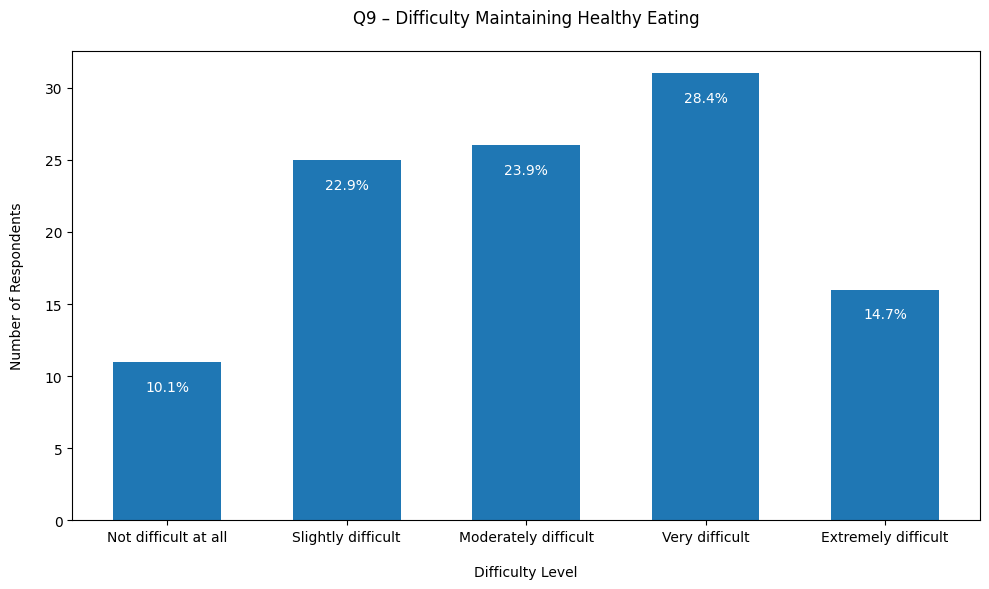

In [549]:
# Q9 – Difficulty Maintaining Healthy Eating (Likert Scale)
# Cross-analysis count: 0

qid = 'Q9'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
bars = plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q9 – Difficulty Maintaining Healthy Eating', pad=20)
plt.xlabel('Difficulty Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q10
-----------------------
                    Count  Percent
Time availability      81    74.31
Emotional state        67    61.47
Physical wellbeing     22    20.18
Budget constraints     20    18.35
Social influence       14    12.84
Other                   1     0.92
-----------------------


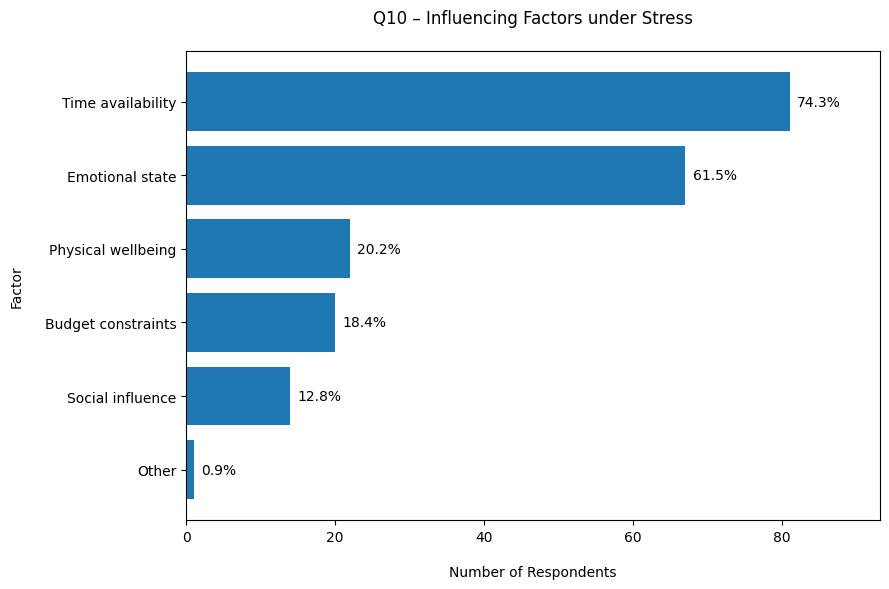

In [550]:
# Q10 – Influencing Factors under Stress (Checkboxes)
# Cross-analysis count: 0

qid = 'Q10'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q10 – Influencing Factors under Stress', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Factor', labelpad=15)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q11
-----------------------
                      Count  Percent
Q11_labeled                         
Not important            13    11.93
Slightly important       12    11.01
Moderately important     35    32.11
Important                28    25.69
Very important           21    19.27
-----------------------
Mean: 3.29
Median: 3.0
Standard Deviation: 1.24
Percentage rating '4' or '5': 45.0%
Percentage rating '1' or '2': 22.9%


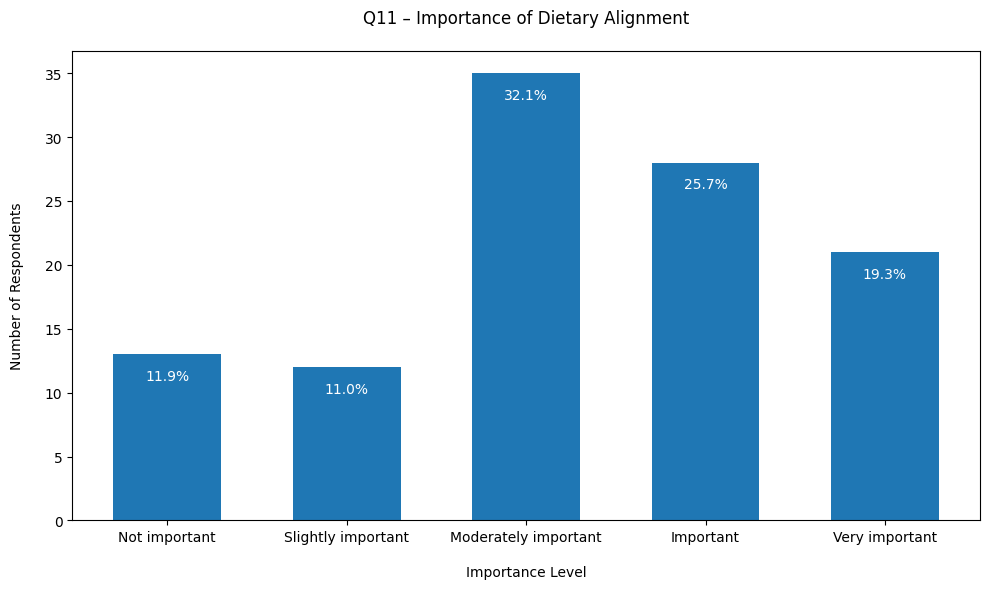

In [551]:
# Q11 – Importance of Dietary Alignment (Likert Scale)
# Cross-analysis count: 0

qid = 'Q11'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q11 – Importance of Dietary Alignment', pad=20)
plt.xlabel('Importance Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()



Quantitative results for Q12
-----------------------
                      Count  Percent
Q12_labeled                         
Not important            10     9.17
Slightly important       18    16.51
Moderately important     36    33.03
Important                30    27.52
Very important           15    13.76
-----------------------
Mean: 3.20
Median: 3.0
Standard Deviation: 1.15
Percentage rating '4' or '5': 41.3%
Percentage rating '1' or '2': 25.7%


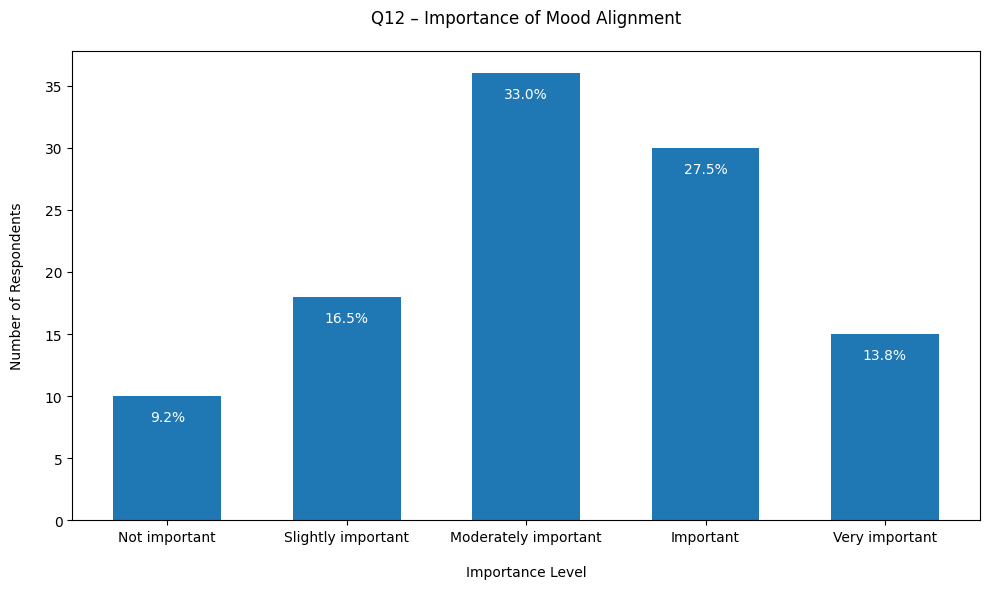

In [552]:
# Q12 – Importance of Mood Alignment (Likert Scale)
# Cross-analysis count: 0

qid = 'Q12'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q12 – Importance of Mood Alignment', pad=20)
plt.xlabel('Importance Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q13
-----------------------
                                  Count  Percent
Nutritional goals                    70    64.22
Available time to cook or eat        66    60.55
Energy or focus levels               59    54.13
Budget constraints                   47    43.12
Sleep or physical health             43    39.45
Mood or emotional state              35    32.11
Cultural food preferences            15    13.76
Religious or ethical preferences     11    10.09
Device data, like wearables           4     3.67
-----------------------


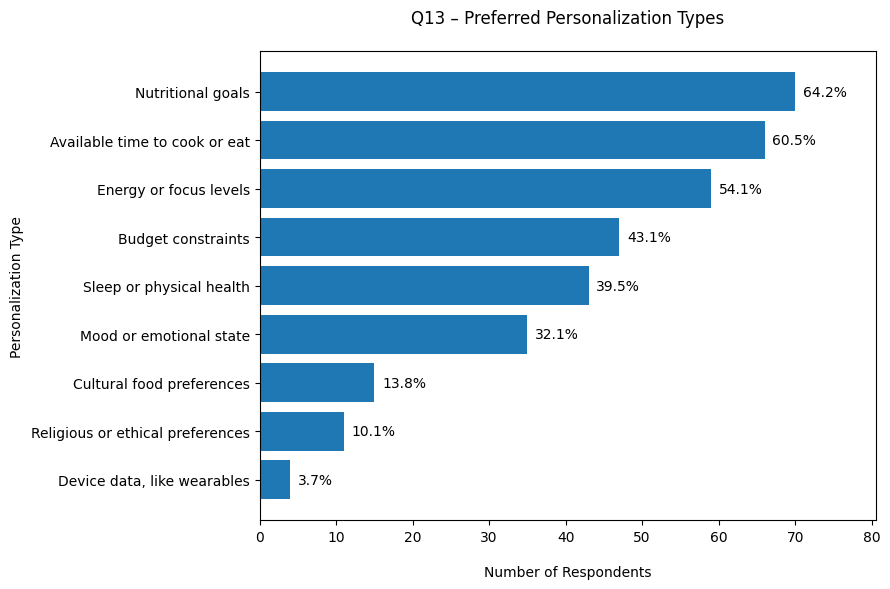

In [553]:
# Q13 – Preferred Personalization Types (Checkboxes)
# Cross-analysis count: 0

qid = 'Q13'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q13 – Preferred Personalization Types', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Personalization Type', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q14
-----------------------
                    Count  Percent
Q14                               
Yes, significantly     30    27.52
Yes                    41    37.61
Only a bit             28    25.69
Not at all             10     9.17
-----------------------


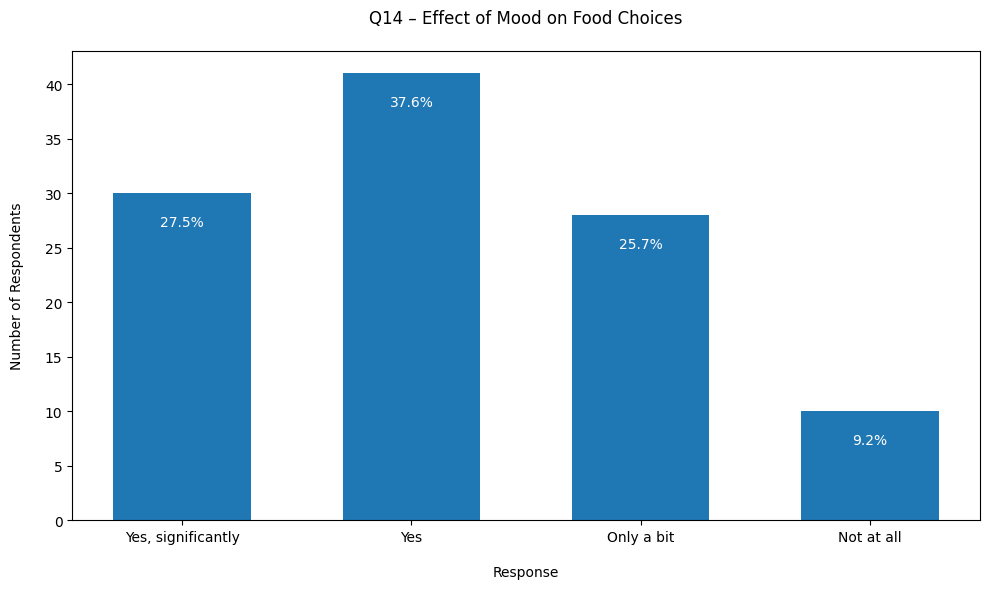

In [554]:
# Q14 – Effect of Mood on Food Choices (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q14'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q14 – Effect of Mood on Food Choices', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q15
-----------------------
          Count  Percent
Q15                     
Yes          67    61.47
No            5     4.59
Not sure     36    33.03
Other         1     0.92
-----------------------


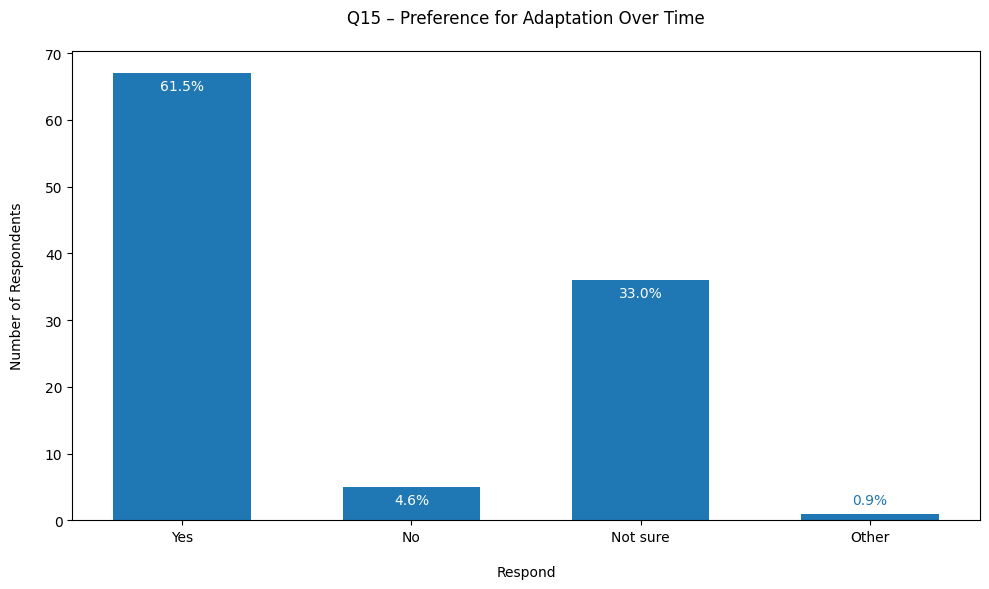

In [555]:
# Q15 – Preference for Adaptation Over Time (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q15'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q15 – Preference for Adaptation Over Time', pad=20)
plt.xlabel('Respond', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on or above bars
for i, (label, count, perc) in enumerate(zip(mc_results.index, mc_results['Count'], mc_results['Percent'])):
    if label == "Other":
        plt.text(i, count + 1, f"{perc:.1f}%", ha='center', va='bottom', color='#1f77b4')
    else:
        plt.text(i, count - 3, f"{perc:.1f}%", ha='center', va='bottom', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q16
-----------------------
                                                Count  Percent
Considers my budget or what food I have            72    66.06
Suggests quick meals when I'm busy                 72    66.06
Adapts to my daily schedule or workload            69    63.30
Lets me rate or respond to each recommendation     50    45.87
Checks how I feel before suggesting food           26    23.85
-----------------------


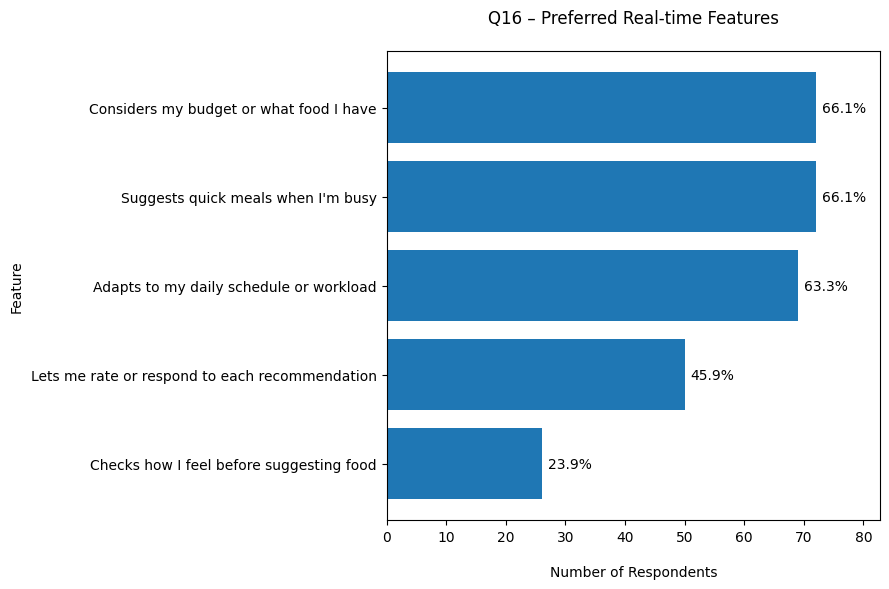

In [556]:
# Q16 – Preferred Real-time Features (Checkboxes)
# Cross-analysis count: 0

qid = 'Q16'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q16 – Preferred Real-time Features', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Feature', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q17
-----------------------
                                           Count  Percent
Healthier snack suggestions                   66    60.55
Tracking meals or consistency                 57    52.29
Setting flexible daily goals                  48    44.04
Gentle reminders                              38    34.86
Celebrating small successes                   34    31.19
Challenges with friends or study groups       26    23.85
Motivational messages based on how I feel     25    22.94
Other                                          3     2.75
-----------------------


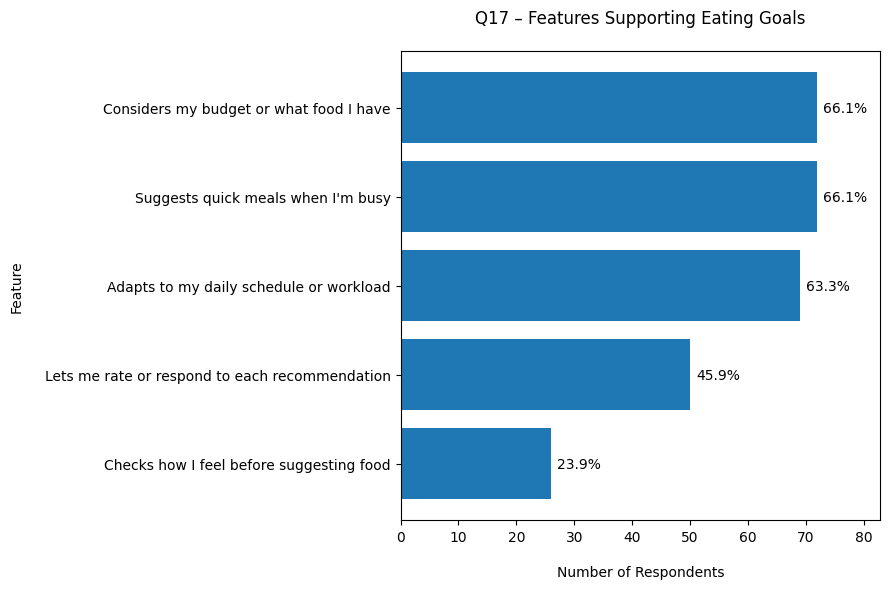

In [557]:
# Q17 – Features Supporting Eating Goals (Checkboxes)
# Cross-analysis count: 0

qid = 'Q17'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q17 – Features Supporting Eating Goals', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Feature', labelpad=15)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q18
-----------------------
             Count  Percent
Q18_labeled                
Not at all      11    10.09
Slightly        15    13.76
Moderately      36    33.03
Mostly          34    31.19
Completely      13    11.93
-----------------------
Mean: 3.21
Median: 3.0
Standard Deviation: 1.14
Percentage rating '4' or '5': 43.1%
Percentage rating '1' or '2': 23.9%


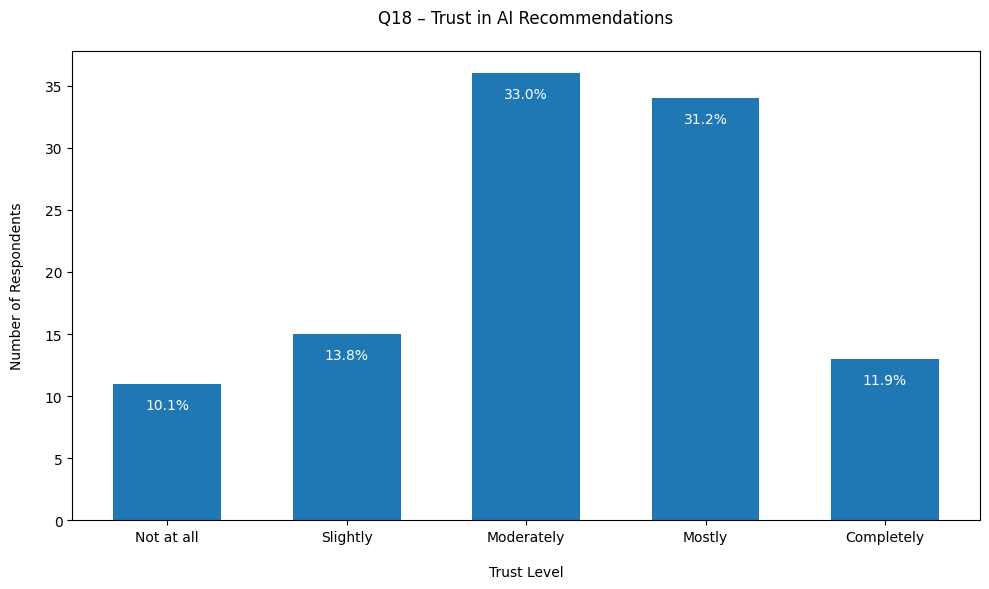

In [558]:
# Q18 – Trust in AI Recommendations (Likert Scale)
# Cross-analysis count: 0

qid = 'Q18'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q18 – Trust in AI Recommendations', pad=20)
plt.xlabel('Trust Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q19
-----------------------
          Count  Percent
Q19                     
Yes          82    75.23
No            8     7.34
Not sure     18    16.51
Other         1     0.92
-----------------------


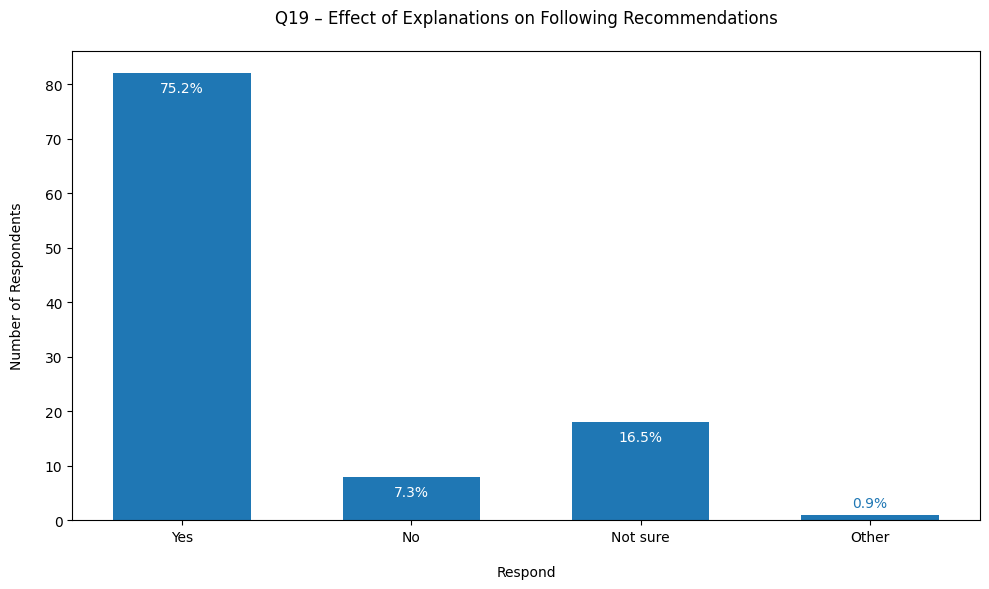

In [559]:
# Q19 – Effect of Explanations on Following Recommendations (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q19'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q19 – Effect of Explanations on Following Recommendations', pad=20)
plt.xlabel('Respond', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on or above bars
for i, (label, count, perc) in enumerate(zip(mc_results.index, mc_results['Count'], mc_results['Percent'])):
    if label == "Other":
        plt.text(i, count + 1, f"{perc:.1f}%", ha='center', va='bottom', color='#1f77b4')
    else:
        plt.text(i, count - 4, f"{perc:.1f}%", ha='center', va='bottom', color='white')


plt.tight_layout()
plt.show()

Quantitative results for Q20
-----------------------
                                                    Count  Percent
It gives a scientific or nutritional reason for...     67    61.47
It fits my current routine or schedule                 57    52.29
It allows me to give feedback on suggestions           56    51.38
It matches my dietary needs                            54    49.54
It builds on what I’ve chosen before                   51    46.79
It reflects my mood or energy level                    29    26.61
It uses friendly or human-like language                28    25.69
Other                                                   5     4.59
-----------------------


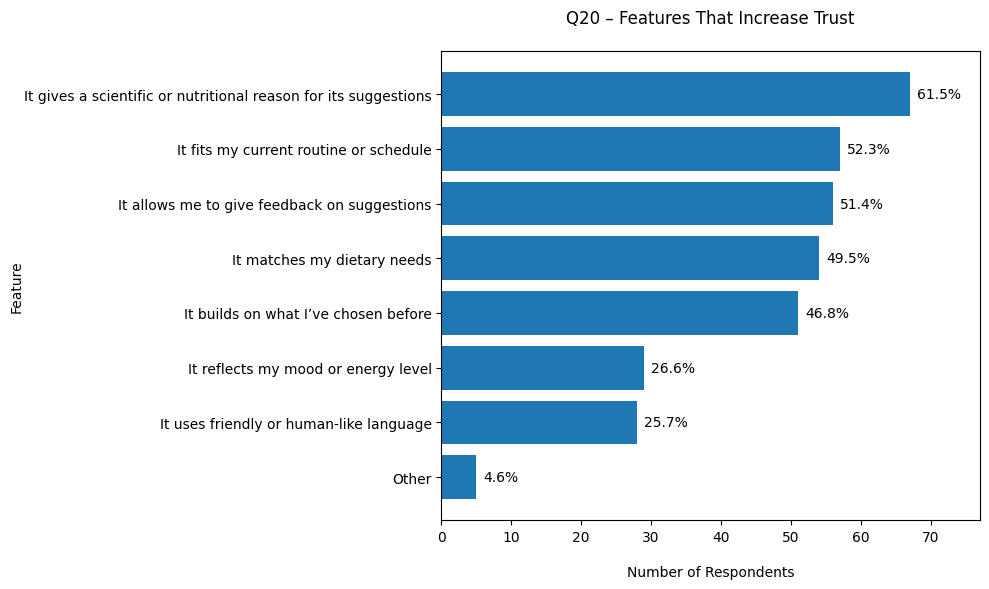

In [560]:
# Q20 – Features That Increase Trust (Checkboxes)
# Cross-analysis count: 0

qid = 'Q20'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(10,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q20 – Features That Increase Trust', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Feature', labelpad=0)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


In [561]:
# Q21 - Stress Effect on Trust (Open-ended)
# Not Setuped
# Not finished

qid = 'Q21'

cleaned_q21 = open_ended_block(qid)


61 responses for Q21


Quantitative results for Q22
-----------------------
                                        Count  Percent
My dietary needs or preferences            91    83.49
My budget                                  67    61.47
My daily schedule or class timetable       63    57.80
My stress levels                           51    46.79
My sleep patterns                          42    38.53
My emotional state                         32    29.36
Data from wearables or health trackers     29    26.61
Other                                       4     3.67
-----------------------


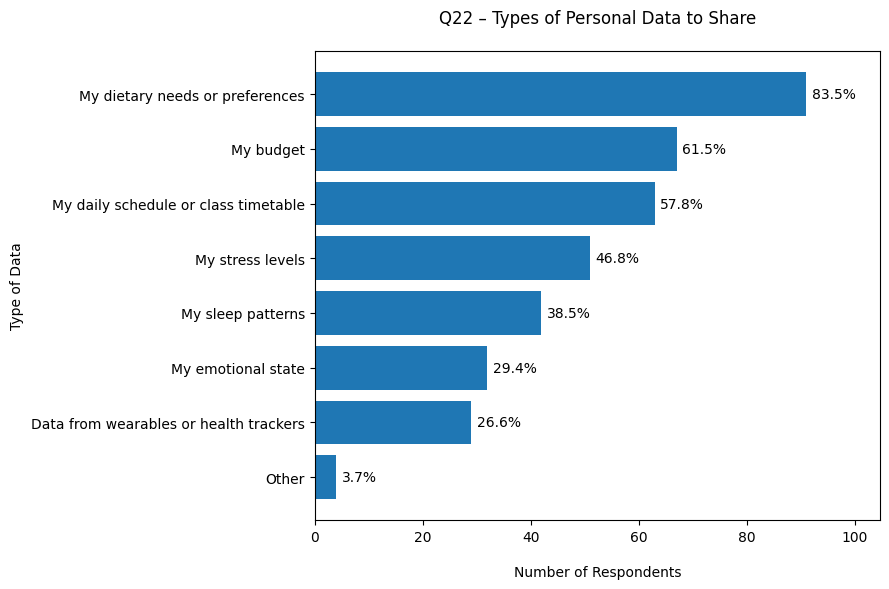

In [562]:
# Q22 – Types of Personal Data to Share (Checkboxes)
# Cross-analysis count: 0

qid = 'Q22'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q22 – Types of Personal Data to Share', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Type of Data', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q23
-----------------------
                               Count  Percent
Q23                                          
I’d be more willing               29    26.61
I’d be less willing               25    22.94
It wouldn’t make a difference     35    32.11
Not sure                          15    13.76
Other                              5     4.59
-----------------------


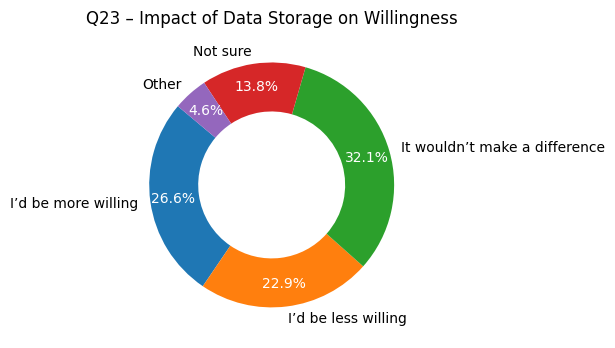

In [563]:
# Q23 – Impact of Data Storage on Willingness (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q23'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

""" # Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q23 – Impact of Data Storage on Willingness', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show() """

# Plot the results
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    mc_results['Count'],
    labels=mc_results.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.81,
    wedgeprops={'width':0.4}
)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Q23 – Impact of Data Storage on Willingness')
plt.tight_layout()
plt.show()


Quantitative results for Q24
-----------------------
                      Count  Percent
Q24_labeled                         
Not important             4     3.67
Slightly important        6     5.50
Moderately important     15    13.76
Important                21    19.27
Very important           63    57.80
-----------------------
Mean: 4.22
Median: 5.0
Standard Deviation: 1.11
Percentage rating '4' or '5': 77.1%
Percentage rating '1' or '2': 9.2%


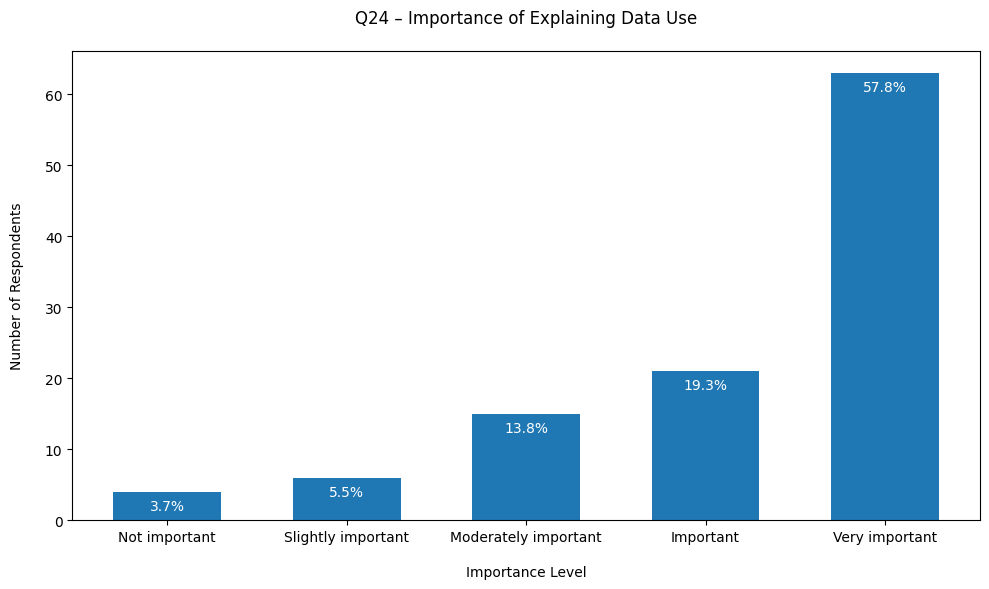

In [564]:
# Q24 – Importance of Explaining Data Use (Likert Scale)
# Cross-analysis count: 0

qid = 'Q24'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q24 – Importance of Explaining Data Use', pad=20)
plt.xlabel('Importance Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2.5, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q25
-----------------------
             Count  Percent
Q25                        
More likely     32    29.36
Less likely      7     6.42
No effect       52    47.71
Not sure        14    12.84
Other            4     3.67
-----------------------


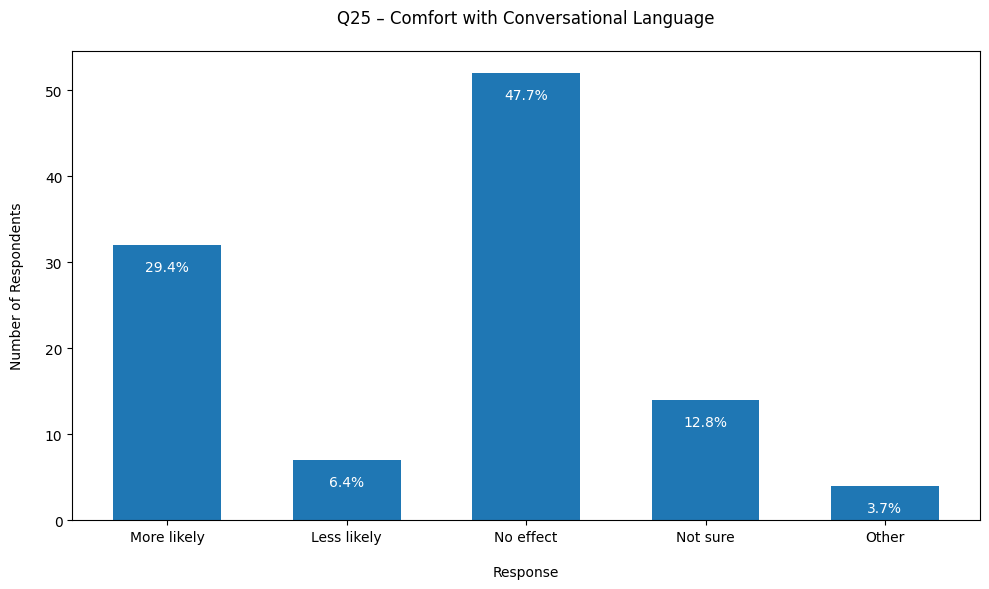

" # Plot the results\nplt.figure(figsize=(6,6))\nwedges, texts, autotexts = plt.pie(\n    mc_results['Count'],\n    labels=mc_results.index,\n    autopct='%1.1f%%',\n    startangle=140,\n    pctdistance=0.81,\n    wedgeprops={'width':0.4}\n)\n\nfor autotext in autotexts:\n    autotext.set_color('white')\n\nplt.title('Q25 – Comfort with Conversational Language')\nplt.tight_layout()\nplt.show() "

In [565]:
# Q25 – Comfort with Conversational Language (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q25'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q25 – Comfort with Conversational Language', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()

""" # Plot the results
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    mc_results['Count'],
    labels=mc_results.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.81,
    wedgeprops={'width':0.4}
)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Q25 – Comfort with Conversational Language')
plt.tight_layout()
plt.show() """


In [566]:
# Q26 – Motivation to Continue Usage (Open-ended)
# Not Setuped
# Not finished

qid = 'Q26'

cleaned_q26 = open_ended_block(qid)


104 responses for Q26


Quantitative results for Q27
-----------------------
                                          Count  Percent
Q27                                                     
Yes, many times                              15    13.76
Yes, sometimes                               39    35.78
No, but I’ve used it for other topics        37    33.94
No, I’ve never used tools like ChatGPT       10     9.17
I’ve heard of them, but never tried them      7     6.42
Other                                         1     0.92
-----------------------


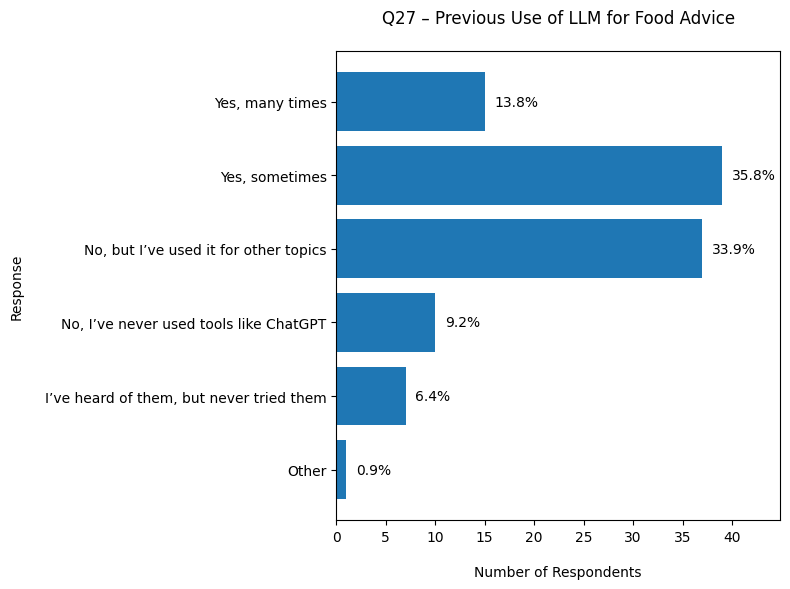

In [567]:
# Q27 – Previous Use of LLM for Food Advice (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q27'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Flip the responses
mc_results_flipped = mc_results.iloc[::-1]

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_flipped.index, mc_results_flipped['Count'], color='#1f77b4')
plt.title('Q27 – Previous Use of LLM for Food Advice', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Response', labelpad=15)
max_count = mc_results_flipped['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_flipped['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q28
-----------------------
     Count  Percent
Q28                
Yes     54    49.54
No      55    50.46
-----------------------


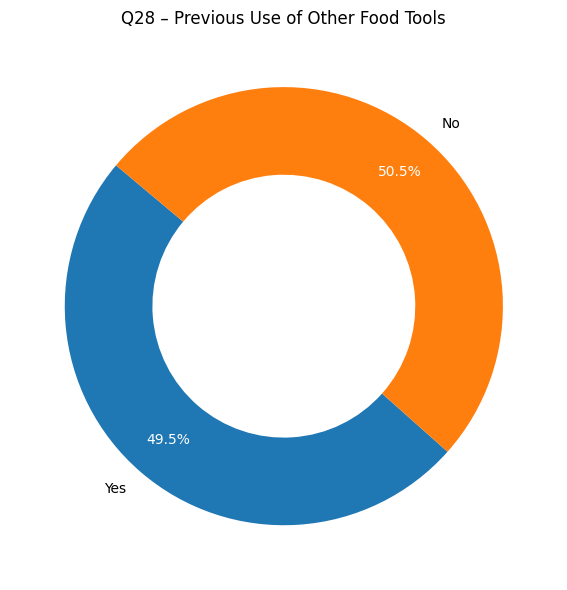

In [568]:
# Q28 – Previous Use of Other Food Tools (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q28'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    mc_results['Count'],
    labels=mc_results.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.81,
    wedgeprops={'width':0.4}
)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Q28 – Previous Use of Other Food Tools')
plt.tight_layout()
plt.show()


Quantitative results for Q29
-----------------------
                                                  Count  Percent
Q29                                                             
Yes, often                                            7     6.42
Occasionally                                          7     6.42
Rarely                                                9     8.26
Never                                                27    24.77
Not applicable / I don’t follow such preferences     57    52.29
Other                                                 2     1.83
-----------------------


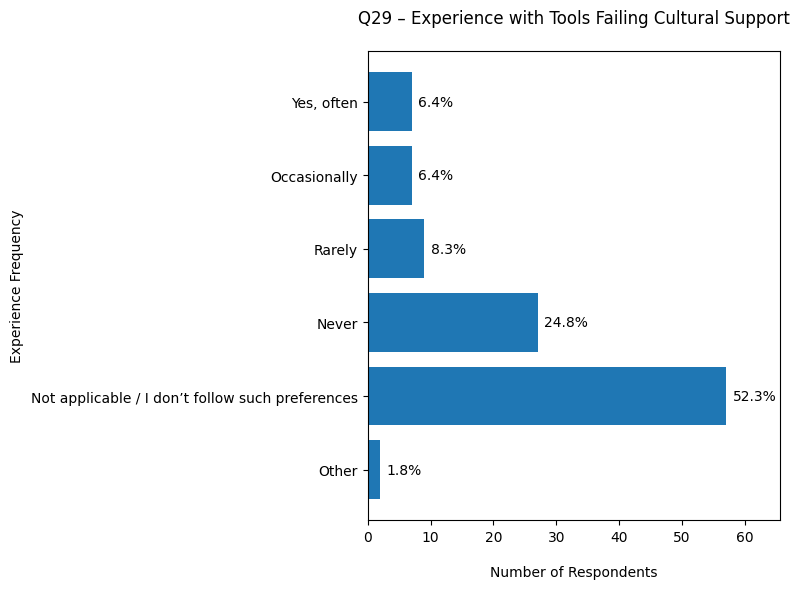

In [569]:
# Q29 – Experience with Tools Failing Cultural Support (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q29'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Flip the responses
mc_results_flipped = mc_results.iloc[::-1]

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_flipped.index, mc_results_flipped['Count'], color='#1f77b4')
plt.title('Q29 – Experience with Tools Failing Cultural Support', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Experience Frequency', labelpad=5)
max_count = mc_results_flipped['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_flipped['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()

Quantitative results for Q30
-----------------------
          Count  Percent
Q30                     
Yes          24    22.02
No           68    62.39
Not sure     10     9.17
Other         7     6.42
-----------------------


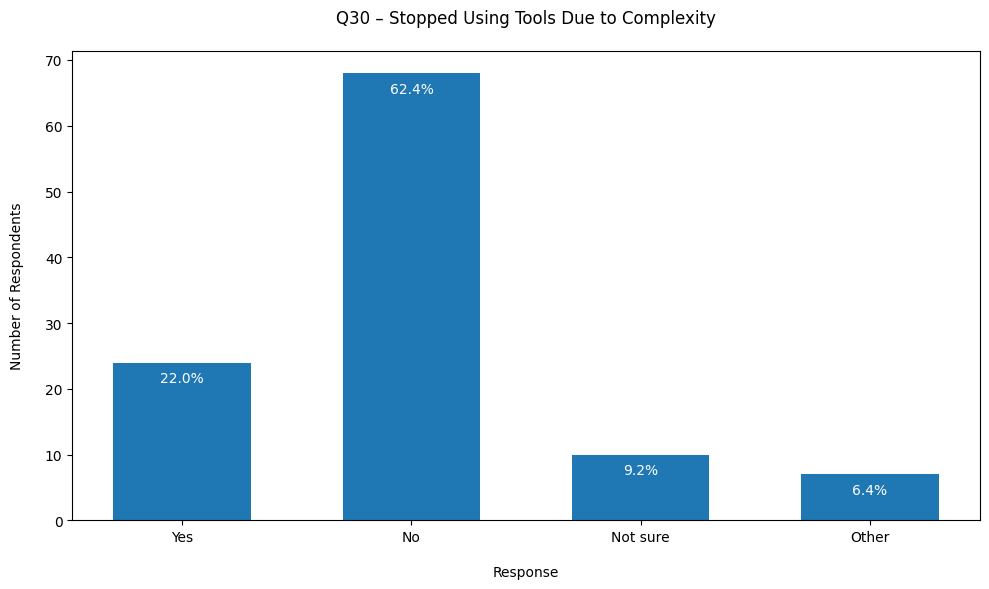

In [570]:
# Q30 – Stopped Using Tools Due to Complexity (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q30'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q30 – Stopped Using Tools Due to Complexity', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')


plt.tight_layout()
plt.show()


Quantitative results for Q31
-----------------------
                                               Count  Percent
Q31                                                          
A chat-style conversation                         18    16.51
A form where I fill in options and get advice     12    11.01
A mix of both                                     67    61.47
Not sure                                           9     8.26
Other                                              3     2.75
-----------------------


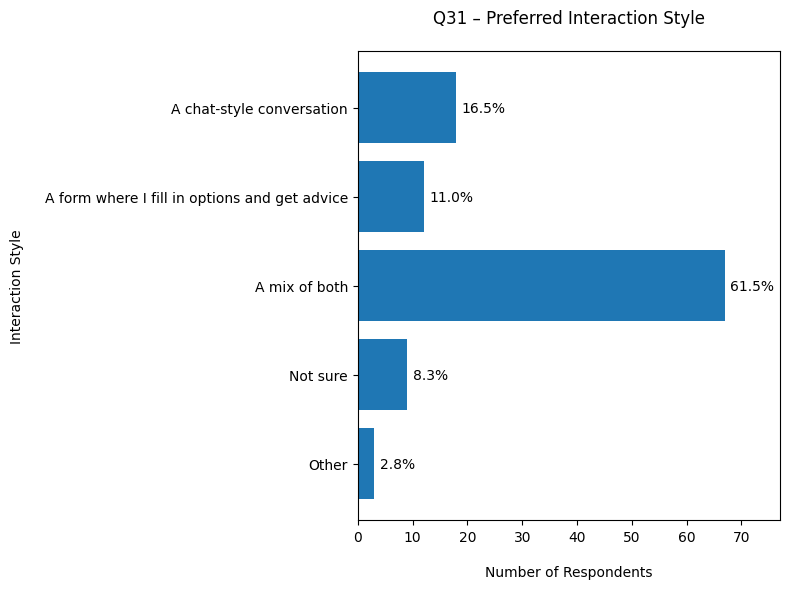

In [571]:
# Q31 – Preferred Interaction Style (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q31'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Flip the responses
mc_results_flipped = mc_results.iloc[::-1]

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_flipped.index, mc_results_flipped['Count'], color='#1f77b4')
plt.title('Q31 – Preferred Interaction Style', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Interaction Style', labelpad=15)
max_count = mc_results_flipped['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_flipped['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q32
-----------------------
                      Count  Percent
Q32_labeled                         
Not confident at all      2     1.83
Slightly confident        9     8.26
Moderately confident     24    22.02
Confident                43    39.45
Very confident           31    28.44
-----------------------
Mean: 3.84
Median: 4.0
Standard Deviation: 0.99
Percentage rating '4' or '5': 67.9%
Percentage rating '1' or '2': 10.1%


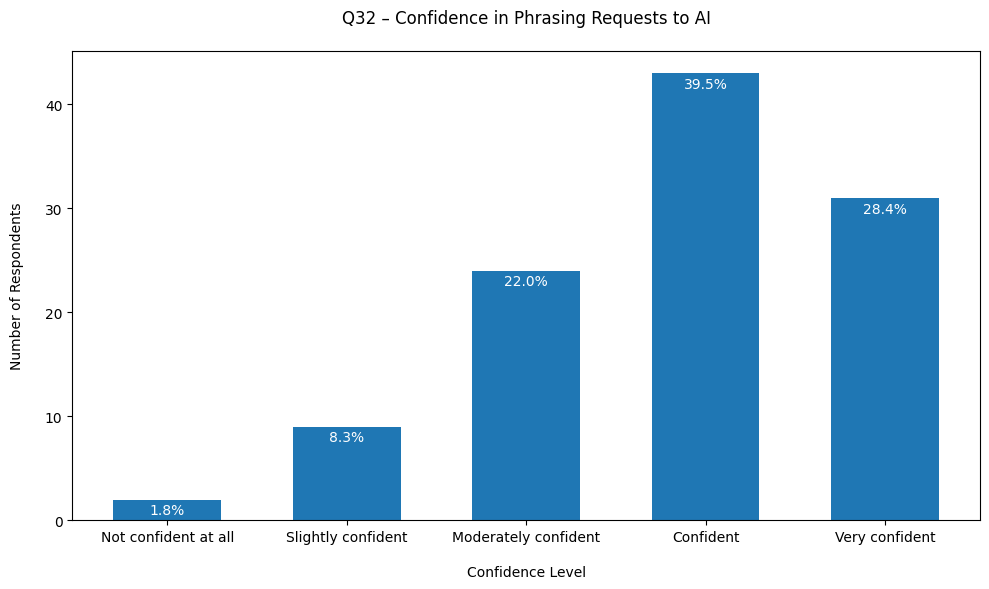

In [572]:
# Q32 – Confidence in Phrasing Requests to AI (Likert Scale)
# Cross-analysis count: 0

qid = 'Q32'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q32 – Confidence in Phrasing Requests to AI', pad=20)
plt.xlabel('Confidence Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 1.4, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q33
-----------------------
                                                    Count  Percent
A helpful conversation that asks clarifying que...     58    53.21
Easy ways to adjust or rewrite my request              56    51.38
Automatic suggestions based on my situation, li...     43    39.45
Pre-written templates to show how to ask a ques...     42    38.53
Step-by-step help for making a request                 36    33.03
Other                                                   1     0.92
-----------------------


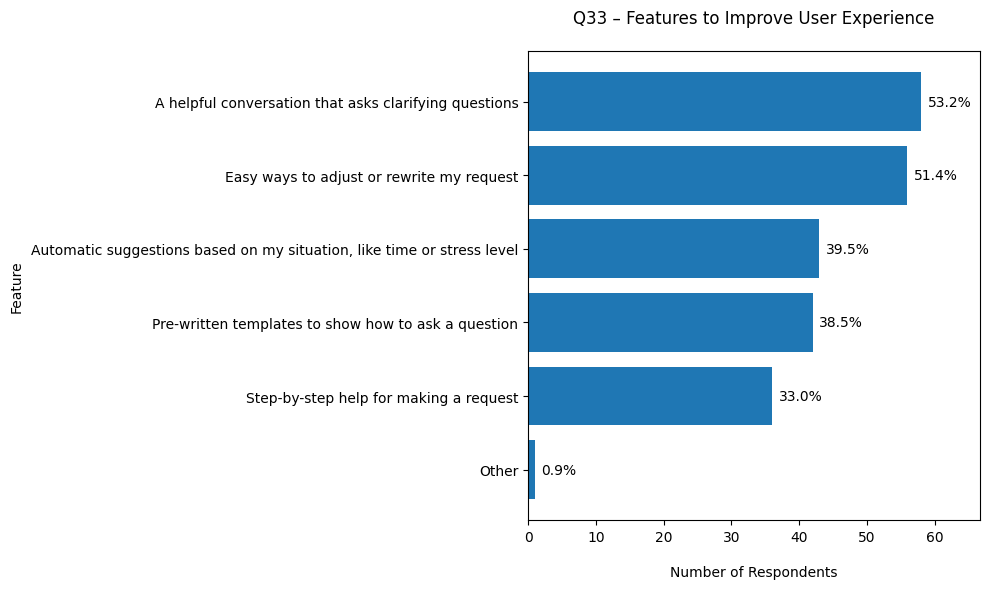

In [573]:
# Q33 – Features to Improve User Experience (Checkboxes)
# Cross-analysis count: 0

qid = 'Q33'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(10,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q33 – Features to Improve User Experience', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Feature', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q34
-----------------------
             Count  Percent
Q34_labeled                
Not at all       8     7.34
Slightly         9     8.26
Moderately      32    29.36
Very            27    24.77
Very much       33    30.28
-----------------------
Mean: 3.62
Median: 4.0
Standard Deviation: 1.21
Percentage rating '4' or '5': 55.0%
Percentage rating '1' or '2': 15.6%


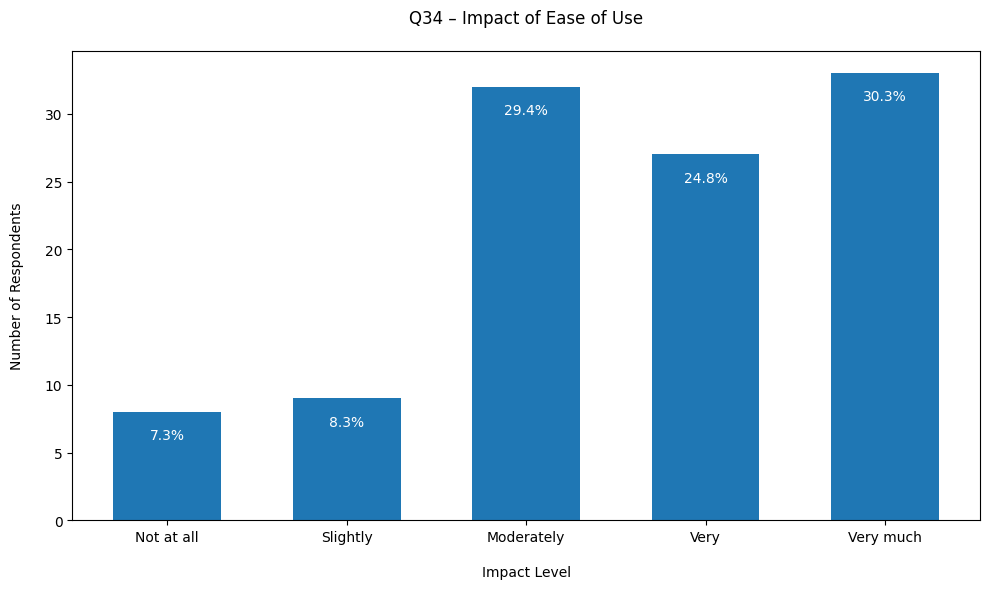

In [574]:
# Q34 – Impact of Ease of Use (Likert Scale)
# Cross-analysis count: 0

qid = 'Q34'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q34 – Impact of Ease of Use', pad=20)
plt.xlabel('Impact Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q35
-----------------------
                                   Count  Percent
Rephrase my request and try again     80    73.39
Ask a follow-up to clarify            49    44.95
Stop using it and look elsewhere      16    14.68
Not sure                               2     1.83
Other                                  3     2.75
-----------------------


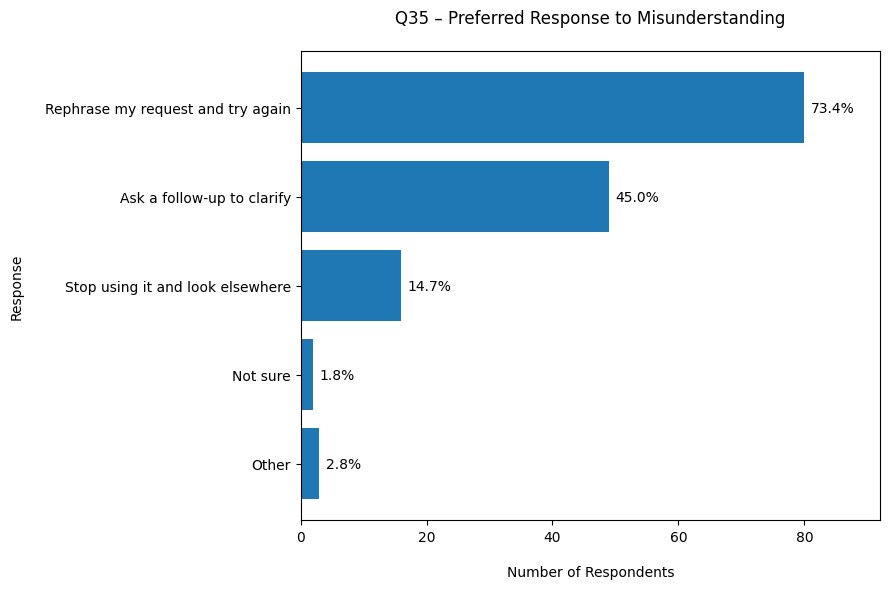

In [575]:
# Q35 – Preferred Response to Misunderstanding (Checkboxes)
# Cross-analysis count: 0

qid = 'Q35'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count and move "Other" to the bottom
other_row = cb_results.loc[['Other']]
main_rows = cb_results.drop('Other')
cb_results_sorted = pd.concat([
    other_row,
    main_rows.sort_values(by='Count', ascending=True)
])

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q35 – Preferred Response to Misunderstanding', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Response', labelpad=15)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


In [576]:
# Q36 – Desired Improvements (Open-ended)
# Not Setuped
# Not finished

qid = 'Q36'

cleaned_q36 = open_ended_block(qid)


86 responses for Q36


In [577]:
# Q37 – Concerns or Reasons for Avoidance (Open-ended)
# Not Setuped
# Not finished

qid = 'Q37'

cleaned_q37 = open_ended_block(qid)


100 responses for Q37


In [578]:
# Q38 – Final Thoughts (Open-ended)
# Not Setuped
# Not finished

qid = 'Q38'

cleaned_q38 = open_ended_block(qid)


31 responses for Q38


In [579]:
# -------- END -------- #

Q9_labeled   Not difficult at all  Slightly difficult  Moderately difficult  \
Q1                                                                            
21 – 23                         1                   9                     7   
24 – 26                         5                  11                    11   
27 or older                     3                   3                     8   
Under 21                        2                   2                     0   

Q9_labeled   Very difficult  Extremely difficult  
Q1                                                
21 – 23                   5                    2  
24 – 26                  13                    8  
27 or older               9                    5  
Under 21                  4                    1  
Q9_labeled   Not difficult at all  Slightly difficult  Moderately difficult  \
Q1                                                                            
21 – 23                  4.166667           37.500000        

<Axes: title={'center': 'Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age'}, xlabel='Q1'>

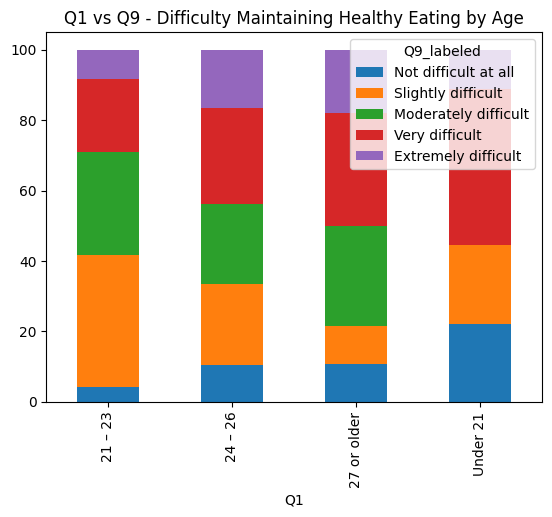

In [580]:
# Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age

cross = pd.crosstab(df['Q1'], df['Q9_labeled'])
print(cross)

# Optional: normalize to percentages
cross_pct = cross.div(cross.sum(axis=1), axis=0) * 100
print(cross_pct)

cross_pct.plot(kind='bar', stacked=True, title='Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age')


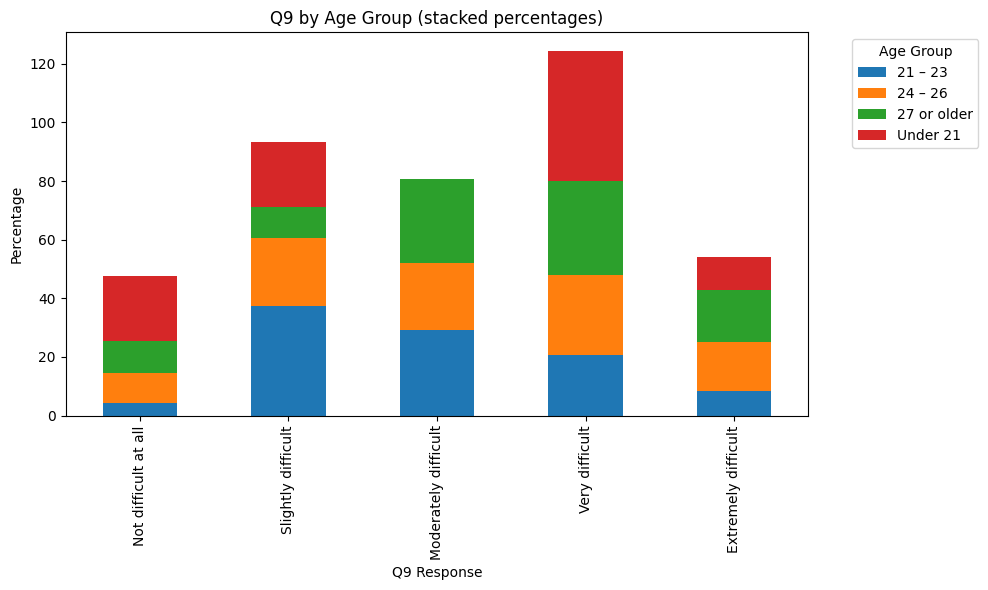

In [581]:
# Usable

cross_pct.T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Q9 by Age Group (stacked percentages)')
plt.ylabel('Percentage')
plt.xlabel('Q9 Response')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


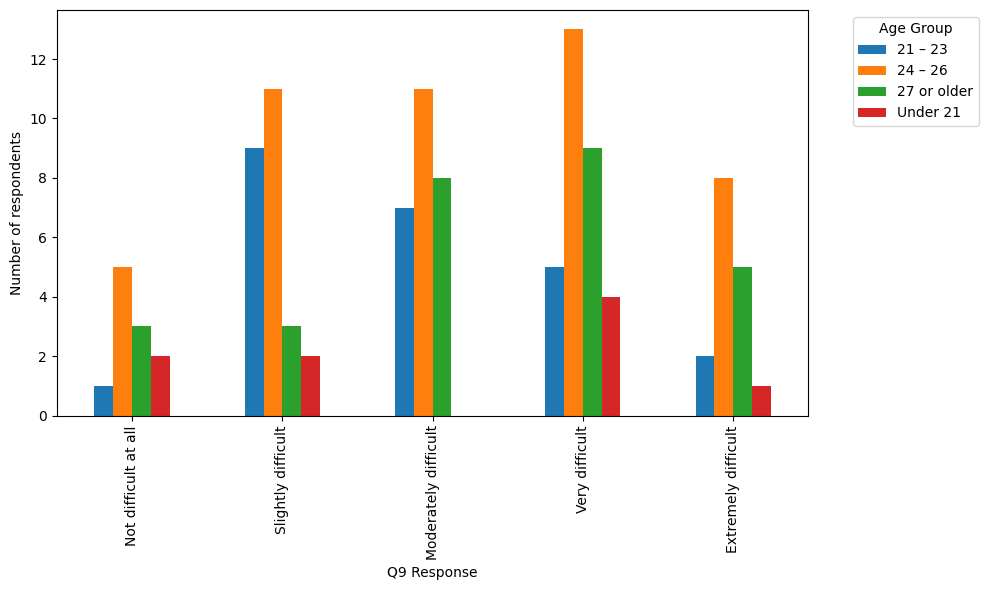

In [582]:
# Usable

cross.T.plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of respondents')
plt.xlabel('Q9 Response')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


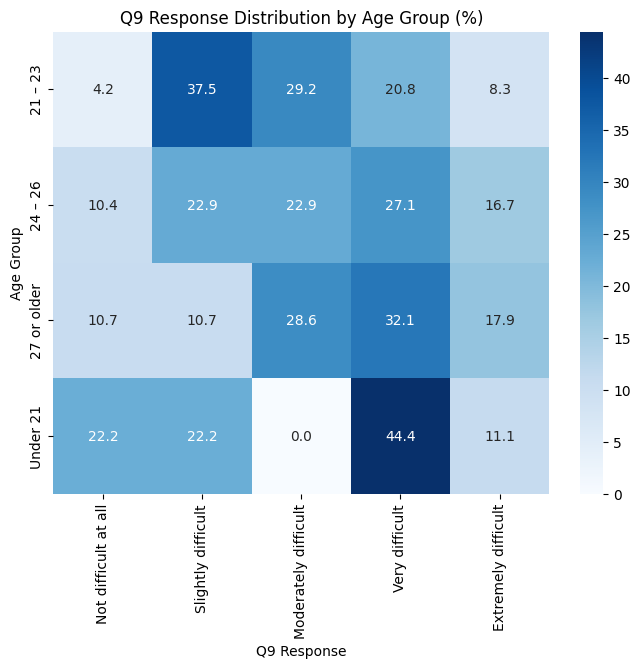

In [583]:
# Usable

plt.figure(figsize=(8,6))
sns.heatmap(cross_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title('Q9 Response Distribution by Age Group (%)')
plt.ylabel('Age Group')
plt.xlabel('Q9 Response')
plt.show()


In [585]:
# Slice columns starting from index 37
df_subset = df.iloc[:, 34:]

# Now get info for that subset
df_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Q35          109 non-null    object  
 1   Q36          107 non-null    object  
 2   Q37          109 non-null    object  
 3   Q38          37 non-null     object  
 4   Q7_labeled   109 non-null    category
 5   Q9_labeled   109 non-null    category
 6   Q11_labeled  109 non-null    category
 7   Q12_labeled  109 non-null    category
 8   Q18_labeled  109 non-null    category
 9   Q24_labeled  109 non-null    category
 10  Q32_labeled  109 non-null    category
 11  Q34_labeled  109 non-null    category
dtypes: category(8), object(4)
memory usage: 6.0+ KB
